<br>

# SciPy-Stats

***

<br>

### A clear and concise overview of the scipy.stats Python library

***

SciPy, short for Scientific Python, is a tool used for scientific analysis of data.
The library within scipy, scipy.stats, allows us to study and solve problems related to probability and statistics. [1]
The module greatly aids our efforts in assessing the random characteristics  of data.
The package runs in situ with the numpy.random package, where we have the ability to generate countless scenarios of data and then we use the scipy.stats libraries ot assess them.
Scipy.stats has functions for both continuous and discrete variables and can work with different types of distributions like the binomial, uniform, and continuous. 
We can also perform the T-test and determine the T-score. [2]


***


<br>

### An example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats

***

This ANOVA assessment shall be carried out using guidelines from the One-Way ANOVA in SPSS tutorial. [3]

The dataset I have chosen to carry out the ANOVA on is the Balance Scale Data set, downloaded from the UCI Machine Learning Repository. [4]

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

***

In [1]:
# Import all relevant packages prior to assessing the dataset.

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

# Turkey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# import dataset and display a few lines for affect

data = pd.read_csv("balance-scale.csv")
data

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


<br>

#### Assumption 1: Dependent Variable

***

The Dependent Value should be a variable and have a numeric value.

In [3]:
# I've chosen the first value  

dependent = data['Left-Weight']
dependent

0      1
1      1
2      1
3      1
4      1
      ..
620    5
621    5
622    5
623    5
624    5
Name: Left-Weight, Length: 625, dtype: int64

In [4]:
# description of the data in "Left Distance"

dependent.describe()

count    625.000000
mean       3.000000
std        1.415346
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Left-Weight, dtype: float64

<br>

#### Assumption 2: Independent Variable

***

The Independent Variable should consist of two or more different categories, in this dataset we have three.

In [5]:
# the only category in our dataset is "Class Name"

independent = data['Class Name']
independent

0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: Class Name, Length: 625, dtype: object

In [6]:
# description of data from class name

independent.describe()

count     625
unique      3
top         R
freq      288
Name: Class Name, dtype: object

<br>

#### Assumption 3: Independence of Observations

***

Each observation can be classified as independent based on the positioning of the weights, these changes would change any result that was expected.

<br>

<br>

#### Assumption 4: Outliers

For the assessment to be significant we have to determine if any outliers alter our results.

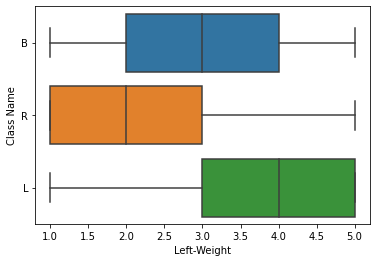

In [7]:
# Box plot of our dependent versus independent variable.

sns.boxplot(x=dependent, y=independent);

The lack of any data points beyond the wings of each box show there are no outliers

<br>

#### Assumption 5: Normality

***

An assessment of the normality of data is a prerequisite for many statistical tests because normal data is an underlying assumption in parametric testing. [5]

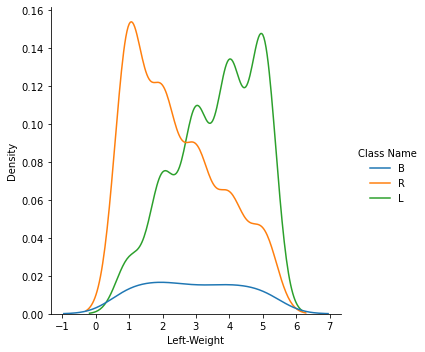

In [8]:
# KDEs of the three categories.

sns.displot(x = dependent, hue = independent, kind="kde")

In [9]:
# Extract the B Left-Weight.
Left_Weight_B = dependent[independent == 'B']
Left_Weight_B

0      1
26     1
30     1
52     1
60     1
78     1
81     1
90     1
104    1
120    1
126    2
130    2
153    2
156    2
165    2
182    2
186    2
208    2
216    2
234    2
246    2
252    3
260    3
282    3
286    3
312    3
338    3
342    3
364    3
372    3
378    4
381    4
390    4
408    4
416    4
438    4
442    4
468    4
494    4
498    4
504    5
520    5
534    5
546    5
564    5
572    5
594    5
598    5
624    5
Name: Left-Weight, dtype: int64

In [10]:
# Run the Shapiro-Wilk test. [6]
ss.shapiro(Left_Weight_B)

ShapiroResult(statistic=0.8887535929679871, pvalue=0.0002406577841611579)

pvalue=0.0002406577841611579 is less than 0.05, hence, the data cannot be described as Normally Distributed.

In [11]:
ss.shapiro(dependent[independent == 'R'])

ShapiroResult(statistic=0.8568956851959229, pvalue=1.1763419929713536e-15)

pvalue=1.1763419929713536e-15 is less than 0.05, hence, the data cannot be described as Normally Distributed.

In [12]:
ss.shapiro(dependent[independent == 'L'])

ShapiroResult(statistic=0.8763298392295837, pvalue=1.7378632577056893e-14)

pvalue=1.7378632577056893e-14 is less than 0.05, hence, the data cannot be described as Normally Distributed.

<br>

#### Assumption 6: Homogeneity of Variances

***

In [13]:
# Test for equal variances. [7]
ss.levene(
    dependent[independent == 'B'],
    dependent[independent == 'R'],
    dependent[independent == 'L']
)

LeveneResult(statistic=1.53317870162787, pvalue=0.21666304565707478)

If the Levene's Test for Equality of Variances is statistically significant, which indicates that the group variances are unequal in the population. [8]

<br>

#### One-Way ANOVA

***

In [14]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'B'],
    dependent[independent == 'R'],
    dependent[independent == 'L']
)

F_onewayResult(statistic=63.395442099716625, pvalue=8.76352861103715e-26)

The mean left weight for Balanced, Left and Right weights are very different from the pValue of 8.7*10-26

<br>

Due to the failing results in Assumption 6, we will carry out a Welch-ANOVA for further information. [9]

In [15]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [16]:
# Perform the test.
welch_anova_np(
    dependent[independent == 'B'],
    dependent[independent == 'R'],
    dependent[independent == 'L']
)

F_onewayResult(statistic=64.28553837458661, pvalue=3.254519609920101e-20)

The mean left weight for Balanced, Left and Right weighings are very different from the pValue of 3.2*10-20

<br>

#### Turkey Post Doc Test for ANOVA

***

# Due to the failing results obtained from our ANOVA we carry out a Post Doc test to further assess our data.

<br>

In this case a Turkey test is carried out. [10]

In [17]:
df = pd.DataFrame({'Left-Weight': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'Class Name': np.repeat(['B', 'R', 'L'], repeats=10)}) 

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['Left-Weight'],
                          groups=df['Class Name'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      L      1.3 0.8864 -5.6728  8.2728  False
     B      R      8.4 0.0158  1.4272 15.3728   True
     L      R      7.1 0.0453  0.1272 14.0728   True
----------------------------------------------------


Thus, we would conclude that there is a statistically significant difference between the means of groups B and R and groups L and R, but not a statistically significant difference between the means of groups B and L.

## References

***

[1]. https://data-flair.training/blogs/scipy-statistical-functions/

[2]. https://www.javatpoint.com/scipy-stats

[3]. https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

[4]. https://archive.ics.uci.edu/ml/datasets/Balance+Scale

[5]. https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

[6]. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[7]. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[8]. https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

[9]. https://github.com/scipy/scipy/issues/11122#issuecomment-587964214

[10]. https://www.statology.org/tukey-test-python/

***